In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sns.set()

In [2]:
a_train = pd.read_csv('Copy of Training Dataset Capstone.csv')
a_train.shape

(186839, 12)

In [3]:
a_test = pd.read_csv('Copy of Testing Dataset Capstone.csv')
a_test.shape

(59252, 12)

In [4]:
agri = pd.merge(a_train,a_test, how = 'outer')
agri.shape

(246091, 12)

In [5]:
agri.head()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,604.2,1.5949,Medium,Low,Low
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,604.2,0.5000,High,High,Moderate
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,604.2,3.1471,Low,Low,Low
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,1381.6,3.6420,Low,Low,Low
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1381.6,0.2292,High,High,Moderate


In [6]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246091 entries, 0 to 246090
Data columns (total 12 columns):
State Name                        246091 non-null object
City Name                         246091 non-null object
Crop_Year                         246091 non-null int64
Season                            246091 non-null object
Crop Name                         246091 non-null object
Area                              246091 non-null float64
Production                        242361 non-null float64
Rain Fall                         245854 non-null float64
Production
per Area               246091 non-null float64
Input Cost
(High/Medium/Low)      246091 non-null object
Market Price
(High/Medium/Low)    246091 non-null object
Return
(High/Moderate/Low)        246091 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 24.4+ MB


In [7]:
agri_1 = agri.copy()

In [8]:
agri_1.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

In [9]:
agri1 = agri_1.drop(['City Name','Area','Production'], axis = 1)
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate


In [10]:
agri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246091 entries, 0 to 246090
Data columns (total 9 columns):
State Name                        246091 non-null object
Crop_Year                         246091 non-null int64
Season                            246091 non-null object
Crop Name                         246091 non-null object
Rain Fall                         245854 non-null float64
Production
per Area               246091 non-null float64
Input Cost
(High/Medium/Low)      246091 non-null object
Market Price
(High/Medium/Low)    246091 non-null object
Return
(High/Moderate/Low)        246091 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 18.8+ MB


In [11]:
agri1.shape

(246091, 9)

In [12]:
agri1.columns

Index(['State Name', 'Crop_Year', 'Season', 'Crop Name', 'Rain Fall',
       'Production\nper Area', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)'],
      dtype='object')

Dropped city name,area,production from the dataset. Now classification of state name,rain fall,crop name, production per area is taken into consideration.

Starting with the crop name first

In [14]:
## 1. Food Crops
fcrops = ['Rice',"Wheat","Other Kharif pulses","Maize","Other Cereals & Millets","Moong(Green Gram)","Masoor",
     "Arhar/Tur","Urad","Cowpea(Lobia)","Moth","Bajra","Jowar","Ragi","Small millets","Peas & beans (Pulses)",
     "Korra","Gram","other misc. pulses","Samai","Varagu","Pulses total","Paddy","Barley","Khesari","Total foodgrain",
     "Lentil","Jobster","Rajmash Kholar","Ricebean (nagadal)",'Other  Rabi pulses']  
# 2. Cash Crops
ccrops = [ "Sugarcane", "Cotton(lint)", "Tobacco", "Jute", "Soyabean", "Sunflower", "other oilseeds", "Oilseeds total", "Castor seed", "Rapeseed &Mustard", "Black pepper",
     "Groundnut","Linseed", "Sesamum", "Mesta", "Niger seed", "Blackgram", "Sannhamp", "Guar seed", "Cond-spcs other",
     "Kapas","Cardamom","Jute & mesta"] 
# 3. Plantation Crop 
pcrops = ["Coconut", "Tea", "Rubber", "Cashewnut", "Arecanut", "Safflower", "Other Dry Fruit", "Cashewnut Processed", "Cashewnut Raw", "Coffee",
    'Coconut ']  
#4. Horticulture Crops
hcrops = ["Grapes", "Garlic", "Onion", "Other Fresh Fruits", "Other Vegetables", "Papaya", "Potato", "Pineapple", "Orange", "Banana", "Water Melon", "Coriander",
      "Bitter Gourd", "Bhindi", "Bottle Gourd", "Brinjal", "Cabbage", "Carrot", "Cauliflower", "Citrus Fruit", "Jack Fruit", "Pome Fruit", "Redish", "Sweet potato", "Tapioca",
      "Tomato", "Turmeric", "Dry ginger", "Dry chillies", "Horse-gram", "Peas  (vegetable)", "Beans & Mutter(Vegetable)", "Cucumber", "other fibres", "Pome Granet",
      "Ginger", "Turnip", "Sapota", "Lemon", "Colocosia","Bean", "Perilla", 'Arcanut (Processed)', "Atcanut (Raw)", "Drum Stick", "Snak Guard", "Ash Gourd", "Beet Root",
      "Lab-Lab", "Ribed Guard", "Yam", "Pump Kin", "Apple", "Peach", "Pear", "Plums", "Litchi", "Ber", 'Mango', 'Other Citrus Fruit' ]

In [15]:
def crop(name):
    if name in fcrops:
        return("Food Crops")
    elif name in ccrops: 
        return("Cash Crops")
    elif name in pcrops:
        return("Plantation Crops")
    elif name in hcrops:
        return("Horticulture Crops") 
    else:
        return(name)

In [16]:
agri1['Crop_Name_Cat'] = agri1['Crop Name'].apply(crop)
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops


Classification of State Names

In [17]:
agri1["Regions"]=agri1["State Name"].map({'Andaman and Nicobar Islands':"East Region",'Andhra Pradesh':"South Region",
                                                "Arunachal Pradesh":"East Region",'Assam':"East Region",'Bihar':"East Region",
                                                'Chandigarh':"North Region",'Dadra and Nagar Haveli':"West Region",
                                                "Goa":"West Region","Gujarat":"West Region",'Haryana':"North Region",
                                                'Himachal Pradesh':"North Region",'Jammu and Kashmir ':"North Region", 
                                                'Jharkhand':"East Region",'Madhya Pradesh':"North Region", 
                                                'Maharashtra':"West Region",'Manipur':"East Region",'Meghalaya':"East Region",
                                                'Mizoram':"East Region",'Nagaland':"East Region",'Odisha':"East Region",'Puducherry'
                                                :"South Region",'Punjab':"North Region",'Rajasthan':"West Region",'Sikkim':"East Region"
                                                ,'Telangana ':"South Region",'Tripura':"East Region",'Uttar Pradesh':"East Region",'Uttarakhand':"North Region",
                                                'Chhattisgarh':"East Region", 'Karnataka':"South Region", 'Kerala':"South Region", 'Tamil Nadu':"South Region", 
                                                'West Bengal':"East Region"})
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops,East Region
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops,East Region
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops,East Region
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops,East Region
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops,East Region


Classification of Rainfall

In [20]:
def rainfall(x) :
    if x<=600 :
        return ("Low Rainfall")
    elif 600 < x <=1200 :
        return ("Average Rainfall")
    else :
        return ("High Rainfall")

In [21]:
agri1["Level_RainFall"]=agri1["Rain Fall"].apply(rainfall)
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions,Level_RainFall
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops,East Region,Average Rainfall
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops,East Region,Average Rainfall
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops,East Region,Average Rainfall
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops,East Region,High Rainfall
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops,East Region,High Rainfall


Classification of Production Per Area

In [22]:
agri1.columns

Index(['State Name', 'Crop_Year', 'Season', 'Crop Name', 'Rain Fall',
       'Production\nper Area', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)',
       'Crop_Name_Cat', 'Regions', 'Level_RainFall'],
      dtype='object')

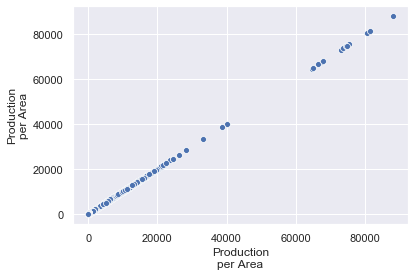

In [23]:
sns.scatterplot(agri1['Production\nper Area'], agri1['Production\nper Area'])
plt.show()

In [25]:
agri1['Production\nper Area'].describe()

count    246091.000000
mean         41.017785
std         811.369139
min           0.000000
25%           0.500000
50%           1.000000
75%           2.312400
max       88000.000000
Name: Production\nper Area, dtype: float64

In [26]:
agri1['Production\nper Area'].value_counts()

0.0000     7261
1.0000     7096
0.5000     4051
0.3333     1887
2.0000     1675
0.6667     1472
0.2500     1068
0.4000     1054
1.5000     1004
0.6000      985
0.7500      902
3.0000      853
0.8000      767
0.2000      675
1.3333      506
0.8333      494
5.0000      470
0.5714      440
1.2000      424
0.2857      418
0.4286      414
4.0000      382
1.2500      371
1.6667      366
0.1667      356
0.7143      348
2.5000      346
0.3000      345
0.6250      332
0.3750      331
           ... 
22.8103       1
5.5496        1
6.3170        1
14.5345       1
16.4663       1
22.0540       1
8.7736        1
7.1244        1
38.3782       1
7.5642        1
3.0963        1
10.7330       1
4.7704        1
2.9484        1
19.7894       1
23.1939       1
2.8961        1
3.2286        1
91.8394       1
6.5841        1
4.6356        1
22.3852       1
5.6497        1
5.5251        1
12.3991       1
7.8065        1
4.2100        1
12.2903       1
18.3688       1
3.6780        1
Name: Production\nper Ar

In [27]:
a = agri1[agri1['Production\nper Area'] == 0.000000].index

In [28]:
(7000)/258000*100 #so we can drop these rows it will not create much impact 

2.7131782945736433

In [29]:
agri1.drop(index=a,axis=0,inplace=True)

In [30]:
agri1['Production\nper Area'].value_counts()

1.0000     7096
0.5000     4051
0.3333     1887
2.0000     1675
0.6667     1472
0.2500     1068
0.4000     1054
1.5000     1004
0.6000      985
0.7500      902
3.0000      853
0.8000      767
0.2000      675
1.3333      506
0.8333      494
5.0000      470
0.5714      440
1.2000      424
0.2857      418
0.4286      414
4.0000      382
1.2500      371
1.6667      366
0.1667      356
0.7143      348
2.5000      346
0.3000      345
0.6250      332
0.3750      331
0.8571      314
           ... 
2.7705        1
4.9500        1
3.6764        1
2.8240        1
2.3258        1
4.9350        1
31.7040       1
22.8446       1
24.4716       1
6.4570        1
6.3210        1
3.2581        1
12.9796       1
94.0909       1
5.4795        1
7.5964        1
67.0204       1
91.2070       1
13.2785       1
39.9083       1
38.0917       1
7.8409        1
8.0598        1
2.9652        1
9.3300        1
18.7150       1
2.0972        1
38.3313       1
12.5397       1
9.6080        1
Name: Production\nper Ar

In [31]:
agri1['Production\nper Area'].describe()

count    238830.000000
mean         42.264823
std         823.578623
min           0.000100
25%           0.532300
50%           1.000000
75%           2.400000
max       88000.000000
Name: Production\nper Area, dtype: float64

In [33]:
print(agri1['Production\nper Area'].quantile(0.15))
print(agri1['Production\nper Area'].quantile(0.30))
print(agri1['Production\nper Area'].quantile(0.60))
print(agri1['Production\nper Area'].quantile(0.80))
print(agri1['Production\nper Area'].quantile(0.90))
print(agri1['Production\nper Area'].quantile(1))

0.3846
0.6162699999999997
1.3448
3.1739
10.0
88000.0


In [34]:
prod_labels = ['Very Low Production', 'Low Production', 'Moderate Production', 'High Production','Very High Production', 'Very Very High Production']
prod_bins = [0, 0.38, 0.616 , 1.34, 3.17, 10.0, 88000 ]
agri1['PPA_Labels'] = pd.cut(agri1['Production\nper Area'], bins=prod_bins, labels=prod_labels)
agri1['PPA_Labels'].value_counts()

Moderate Production          71503
High Production              47895
Low Production               36289
Very Low Production          35338
Very High Production         24067
Very Very High Production    23738
Name: PPA_Labels, dtype: int64

In [35]:
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions,Level_RainFall,PPA_Labels
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops,East Region,Average Rainfall,High Production
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops,East Region,Average Rainfall,Low Production
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops,East Region,Average Rainfall,High Production
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops,East Region,High Rainfall,Very High Production
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops,East Region,High Rainfall,Very Low Production


In [36]:
agri1.isnull().sum()

State Name                           0
Crop_Year                            0
Season                               0
Crop Name                            0
Rain Fall                          230
Production\nper Area                 0
Input Cost\n(High/Medium/Low)        0
Market Price\n(High/Medium/Low)      0
Return\n(High/Moderate/Low)          0
Crop_Name_Cat                        0
Regions                              0
Level_RainFall                       0
PPA_Labels                           0
dtype: int64

In [37]:
agri1.isnull().sum()/agri1.shape[0]*100

State Name                         0.000000
Crop_Year                          0.000000
Season                             0.000000
Crop Name                          0.000000
Rain Fall                          0.096303
Production\nper Area               0.000000
Input Cost\n(High/Medium/Low)      0.000000
Market Price\n(High/Medium/Low)    0.000000
Return\n(High/Moderate/Low)        0.000000
Crop_Name_Cat                      0.000000
Regions                            0.000000
Level_RainFall                     0.000000
PPA_Labels                         0.000000
dtype: float64

In [38]:
agri1.dropna(axis = 0, inplace = True)

In [39]:
agri1.isnull().sum()

State Name                         0
Crop_Year                          0
Season                             0
Crop Name                          0
Rain Fall                          0
Production\nper Area               0
Input Cost\n(High/Medium/Low)      0
Market Price\n(High/Medium/Low)    0
Return\n(High/Moderate/Low)        0
Crop_Name_Cat                      0
Regions                            0
Level_RainFall                     0
PPA_Labels                         0
dtype: int64

In [40]:
agri1['PPA_Labels'].value_counts()

Moderate Production          71469
High Production              47764
Low Production               36270
Very Low Production          35310
Very High Production         24049
Very Very High Production    23738
Name: PPA_Labels, dtype: int64

In [41]:
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions,Level_RainFall,PPA_Labels
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops,East Region,Average Rainfall,High Production
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops,East Region,Average Rainfall,Low Production
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops,East Region,Average Rainfall,High Production
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops,East Region,High Rainfall,Very High Production
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops,East Region,High Rainfall,Very Low Production


In [42]:
agri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238600 entries, 0 to 246090
Data columns (total 13 columns):
State Name                        238600 non-null object
Crop_Year                         238600 non-null int64
Season                            238600 non-null object
Crop Name                         238600 non-null object
Rain Fall                         238600 non-null float64
Production
per Area               238600 non-null float64
Input Cost
(High/Medium/Low)      238600 non-null object
Market Price
(High/Medium/Low)    238600 non-null object
Return
(High/Moderate/Low)        238600 non-null object
Crop_Name_Cat                     238600 non-null object
Regions                           238600 non-null object
Level_RainFall                    238600 non-null object
PPA_Labels                        238600 non-null category
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 23.9+ MB


In [43]:
agri_2 = agri1.copy()
agri_2.columns

Index(['State Name', 'Crop_Year', 'Season', 'Crop Name', 'Rain Fall',
       'Production\nper Area', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)',
       'Crop_Name_Cat', 'Regions', 'Level_RainFall', 'PPA_Labels'],
      dtype='object')

In [44]:
agri2 = agri_2.drop(['State Name','Crop Name','Rain Fall','Production\nper Area'], axis = 1)
agri2.head()

,Crop_Year,Season,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions,Level_RainFall,PPA_Labels
0,2000,Kharif,Medium,Low,Low,Plantation Crops,East Region,Average Rainfall,High Production
1,2000,Kharif,High,High,Moderate,Food Crops,East Region,Average Rainfall,Low Production
2,2000,Kharif,Low,Low,Low,Food Crops,East Region,Average Rainfall,High Production
3,2000,Whole Year,Low,Low,Low,Horticulture Crops,East Region,High Rainfall,Very High Production
4,2000,Whole Year,High,High,Moderate,Plantation Crops,East Region,High Rainfall,Very Low Production


In [45]:
agri2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238600 entries, 0 to 246090
Data columns (total 9 columns):
Crop_Year                         238600 non-null int64
Season                            238600 non-null object
Input Cost
(High/Medium/Low)      238600 non-null object
Market Price
(High/Medium/Low)    238600 non-null object
Return
(High/Moderate/Low)        238600 non-null object
Crop_Name_Cat                     238600 non-null object
Regions                           238600 non-null object
Level_RainFall                    238600 non-null object
PPA_Labels                        238600 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 16.6+ MB


In [46]:
# Changing datatype of columns
agri2['Crop_Year'] = agri2['Crop_Year'].astype('object')
agri2['PPA_Labels'] = agri2['PPA_Labels'].astype('object')

In [47]:
print(agri2.shape)
print(agri2.info())

(238600, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 238600 entries, 0 to 246090
Data columns (total 9 columns):
Crop_Year                         238600 non-null object
Season                            238600 non-null object
Input Cost
(High/Medium/Low)      238600 non-null object
Market Price
(High/Medium/Low)    238600 non-null object
Return
(High/Moderate/Low)        238600 non-null object
Crop_Name_Cat                     238600 non-null object
Regions                           238600 non-null object
Level_RainFall                    238600 non-null object
PPA_Labels                        238600 non-null object
dtypes: object(9)
memory usage: 18.2+ MB
None


In [48]:
agri2.columns

Index(['Crop_Year', 'Season', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)',
       'Crop_Name_Cat', 'Regions', 'Level_RainFall', 'PPA_Labels'],
      dtype='object')

In [49]:
# Replacing Values of Return
agri2['Return\n(High/Moderate/Low)'] = agri2['Return\n(High/Moderate/Low)'].replace({'Low':0, 'Moderate':1}).astype('int')

In [50]:
agri2['Return\n(High/Moderate/Low)'].value_counts()

1    152068
0     86532
Name: Return\n(High/Moderate/Low), dtype: int64

In [53]:
# Label Encoding of columns for base model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
agri2['Input Cost\n(High/Medium/Low)'] = le.fit_transform(agri2['Input Cost\n(High/Medium/Low)'])
agri2['Market Price\n(High/Medium/Low)'] = le.fit_transform(agri2['Market Price\n(High/Medium/Low)'])
agri2['Crop_Year'] = le.fit_transform(agri2['Crop_Year'])
agri2['Season'] = le.fit_transform(agri2['Season'])
agri2['Regions'] = le.fit_transform(agri2['Regions'])
agri2['Level_RainFall'] = le.fit_transform(agri2['Level_RainFall'])
agri2['Crop_Name_Cat'] = le.fit_transform(agri2['Crop_Name_Cat'])
agri2['PPA_Labels'] = le.fit_transform(agri2['PPA_Labels'])

In [54]:
# Spilitting dataset into X and Y
X = agri2.drop(['Return\n(High/Moderate/Low)'], axis = 1)
y = agri2['Return\n(High/Moderate/Low)']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [57]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(167020, 8)
(71580, 8)
(167020,)
(71580,)


In [58]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, cohen_kappa_score

In [59]:
# Base model of Logistic Regression
# SKlearn model
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

model_log = log.fit(Xtrain,ytrain)
y_pred = model_log.predict(Xtest)

C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59     26030
           1       0.76      0.88      0.81     45550

    accuracy                           0.74     71580
   macro avg       0.73      0.69      0.70     71580
weighted avg       0.74      0.74      0.73     71580



In [61]:
print('The accuracy of the LR model is, Accuracy = ', accuracy_score(ytest,y_pred))

The accuracy of the LR model is, Accuracy =  0.7432103939647946


In [67]:
print('The accuracy of the LR model is, Precision =', precision_score(ytest,y_pred))
print("The recall of the LR model is, Recall = ",recall_score(ytest,y_pred))
print("The f1score of the LR model is , F1_Score =",f1_score(ytest,y_pred))
print("The cohen's kappa score of the LR model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred))
print("The ROC_AUC score of the LR model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred))

The accuracy of the LR model is, Precision = 0.7563838822308201
The recall of the LR model is, Recall =  0.8798463227222832
The f1score of the LR model is , F1_Score = 0.8134571472065765
The cohen's kappa score of the LR model is , Cohen's Kappa Score =  0.4089879992011506
The ROC_AUC score of the LR model ,ROC-AUC Score =  0.6919784821448527
